### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [103]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


In [104]:
df.isnull().sum()

OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    1
dtype: int64

In [105]:
df.dtypes

OrderID           int64
Product          object
Category         object
Quantity          int64
Price             int64
CustomerID        int64
Birthdate        object
OrderDate        object
Country          object
DiscountRate    float64
dtype: object

In [106]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [107]:
df['totalRevenue']=df['Quantity'] * df['Price']
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,totalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000


In [108]:
# df.resample('M').sum()

In [109]:
df.groupby('Category')['totalRevenue'].sum().sort_values(ascending=False).head(3)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: totalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [110]:
df.groupby('CustomerID')['totalRevenue'].sum().sort_values(ascending=False).head()

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: totalRevenue, dtype: int64

In [111]:
df.groupby('CustomerID')['OrderID'].count().sort_values(ascending=False).head(9)

CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
1206    2
1508    2
1496    2
1673    2
Name: OrderID, dtype: int64

In [112]:
df['Age'] = np.random.choice([20,30,40,50,60],size=len(df))
df.groupby(['Age','Category'])['OrderID'].count().idxmax()

(np.int64(20), 'Food')

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [113]:
df.groupby('Product')['Quantity'].sum().head(5)

Product
과자     16
과학책    16
노트북    15
라면     10
로션      4
Name: Quantity, dtype: int64

In [114]:
df1 = df.groupby(['Category','Product'])['Quantity'].sum()
df1
#df['Category'].unique()  => ['Books', 'Clothing', 'Electronics', 'Sports', 'Beauty', 'Food']

Category     Product
Beauty       로션          4
             립스틱        22
             샴푸          6
             향수         18
             화장품        13
Books        과학책        16
             비즈니스        6
             소설         21
             역사책        20
             자기계발        5
Clothing     셔츠         25
             스웨터         7
             자켓          7
             청바지         8
Electronics  노트북        15
             스마트워치      14
             스마트폰       10
             태블릿         7
             헤드폰        14
Food         과자         16
             라면         10
             주스          5
             초콜릿        17
             커피         20
Sports       스케이트보드      7
             요가매트       12
             운동화         5
             자전거        12
             축구공        11
Name: Quantity, dtype: int64

In [115]:
df.groupby('Product')['Quantity'].mean().head(3)

Product
과자     2.666667
과학책    3.200000
노트북    3.000000
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

<Axes: xlabel='Week'>

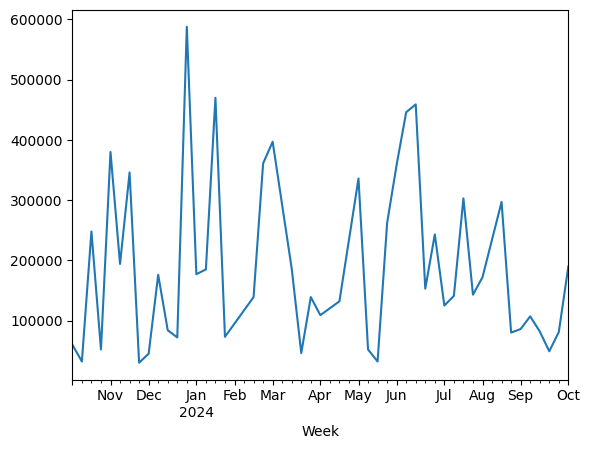

In [116]:
df['Week'] = df['OrderDate'].dt.to_period('W')
df2 = df.groupby('Week')['totalRevenue'].sum()
df2.shape

df2.plot()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5540\34744058.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df3.resample('M', on='OrderDate')['totalRevenue'].sum()


<Axes: >

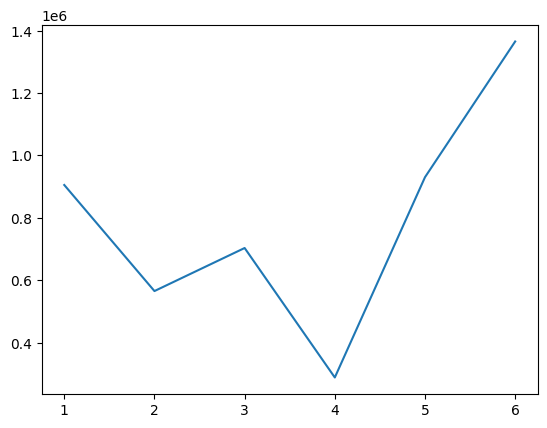

In [117]:
df3 = df[(df['OrderDate']>'2024-01-01')&(df['OrderDate']<'2024-07-01')]
monthly_sales = df3.resample('M', on='OrderDate')['totalRevenue'].sum()
monthly_sales.index = [1,2,3,4,5,6]
monthly_sales.plot()
## 4월 매출이 최저매출을 기록하고 6월에 최고매출을 기록함

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5540\73949346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Hour'] = df4['OrderDate'].dt.hour


<Axes: xlabel='Hour'>

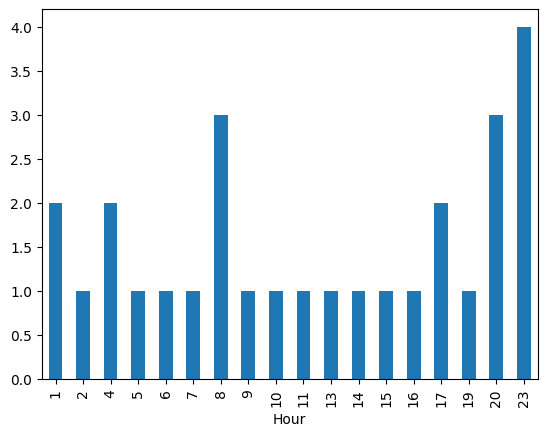

In [118]:
df.groupby('Country')['OrderID'].count().sort_values()

df4=df[df['Country']=='중국']
df4['Hour'] = df4['OrderDate'].dt.hour
df5=df4.groupby('Hour')['OrderID'].count()
df5.plot(kind='bar')

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [119]:
df7 =df.groupby('CustomerID')['OrderID'].count()
len(df7[df7>1])/len(df['CustomerID'].unique())

0.08108108108108109

In [120]:
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,totalRevenue,Age,Week
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000,60,2024-06-10/2024-06-16
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000,60,2023-11-13/2023-11-19
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000,20,2023-10-09/2023-10-15
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000,60,2024-07-15/2024-07-21
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000,60,2024-01-15/2024-01-21


In [122]:
# 상품 카테고리별 할인을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.
df['Dprice'] = (1- df['DiscountRate'])*df['Price']
df['Dtotal'] = df['Dprice'] * df['Quantity']
sales = df.groupby('Category')['Dtotal'].sum()
sales

Category
Beauty         1209380.0
Books          1166780.0
Clothing       1059820.0
Electronics    1453730.0
Food           1473980.0
Sports          866680.0
Name: Dtotal, dtype: float64